# ロジスティック回帰

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

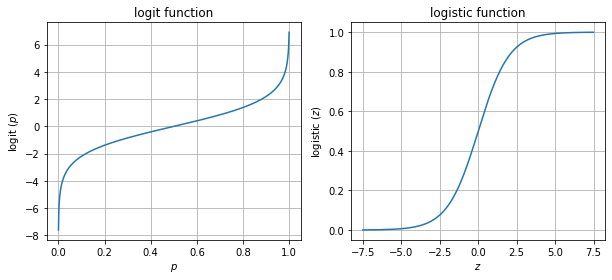

In [2]:
x1 = np.array(range(1, 1999)) * 0.0005
y1 = np.log(x1 / (1 - x1))
x2 = (np.array(range(1000)) - 500) * 0.015
y2 = 1 / (1 + np.exp(-x2))

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
axL.set_title('logit function')
axL.set_xlabel('$p$')
axL.set_ylabel('logit $(p)$')
axL.plot(x1, y1)
axL.grid()
axR.set_title('logistic function')
axR.set_xlabel('$z$')
axR.set_ylabel('logistic $(z)$')
axR.plot(x2, y2)
axR.grid()

plt.show()

In [36]:
import numpy as np

class LogisticRegression:
    def __init__(self, d, eta=0.001, epoch=100, max_err=10):
        """
        Parameters
        ----------
        d : 次元（変数の数）
        eta : 学習率
        epoch : エポック
        max_err : 許容する判定誤りの最大数
        """
        self.d = d
        self.eta = eta
        self.epoch = epoch
        self.max_err = max_err
        self.weight = np.zeros(d+1)  # 閾値を重みと見做す分、1つ増える
    
    def predict(self, x):
        """
        Parameters
        ----------
        x : 分類したいデータ（d次元ベクトル）
        """
        x_st = self.__standardize(x)
        return 1 if np.dot(x_st, self.weight[:-1]) + self.weight[-1] > 0 else 0
    
    def fit(self, data, labels):
        """
        Parameters
        ----------
        data : 
        labels : 
        """
        self.labels = labels
        self.m = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.data = np.append(self.__standardize(data), np.array([[1.0] for _ in range(len(data))]), axis=1)
        for t in range(self.epoch):
            cnt_err = self.__cycle()
            if cnt_err <= self.max_err:
                print('Converged in {} cycles ({} errors in {} samples).'.format(t+1, cnt_err, len(data)))
                break

    def __cycle(self):
        """
        学習の1サイクル
        """
        cnt_err = 0
        dw = np.zeros(len(self.weight))
        for i in range(len(self.data)):
            z = np.dot(self.data[i], self.weight)
            dw += (self.labels[i] - self.__logistic(z)) * self.data[i]
            if (self.labels[i] == 0 and 0 < z) or (self.labels[i] == 1 and 0 >= z):
                cnt_err += 1
        dw *= self.eta
        self.weight += dw
        return cnt_err
    
    def __logistic(self, z):
        return 1 / (np.exp(-z) + 1)

    def __standardize(self, d):
        """
        データを標準化する
        """
        return (d - self.m) / self.std

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot(classifier, data, labels):
    colors = ['red', 'blue']
    x1max, x1min = np.max(data[:, 0]), np.min(data[:, 0])
    x2max, x2min = np.max(data[:, 1]), np.min(data[:, 1])
    scale_x1 = x1max - x1min
    scale_x2 = x2max - x2min
    x1max, x1min = x1max + (x1max-x1min)*0.05, x1min - (x1max-x1min)*0.05
    x2max, x2min = x2max + (x2max-x2min)*0.05, x2min - (x2max-x2min)*0.05
    resolution = scale_x1 / 100
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    z = np.array([classifier.predict(x) for x in np.array([xx1.ravel(), xx2.ravel()]).T])
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors[::-1]))
    
    data_of_each_label = [[], []]
    for d, l in zip(data, labels):
        if l == 1:
            data_of_each_label[0].append(d)
        else:
            data_of_each_label[1].append(d)
    for i in range(len(data_of_each_label)):
        plt.scatter(np.array(data_of_each_label[i])[:, 0], np.array(data_of_each_label[i])[:, 1], s=5, c=colors[i])
    plt.show()

Converged in 100 cycles (16 errors in 1000 samples).


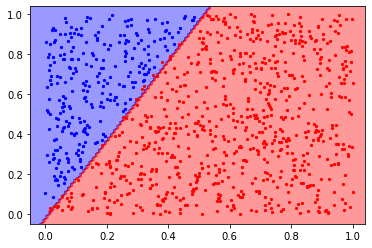

In [46]:
N = 1000
data = np.reshape(np.random.rand(2*N), (N, 2))
labels = np.array([1 if 2*x[0] - x[1] > 0 else 0 for x in data])

max_err = N//100
eta=0.001

lr = LogisticRegression(2, max_err=max_err, eta=eta, epoch=100)
lr.fit(data, labels)
plot(lr, data, labels)

Converged in 2 cycles (0 errors in 200 samples).


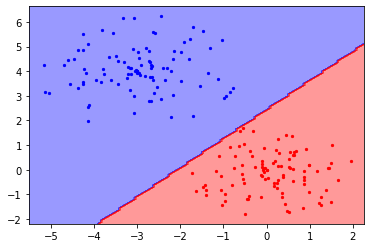

In [45]:
N = 200
c1 = [0, 0]
c2 = [-3, 4]
r1 = 2*np.random.rand(N//2)
r2 = 2.5*np.random.rand(N//2)
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + c1[0], r1 * np.cos(theta1) + c1[1]]).T
data2 = np.array([r2 * np.sin(theta2) + c2[0], r2 * np.cos(theta2) + c2[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])

max_err = N//100
eta=1e-6

lr = LogisticRegression(2, max_err=max_err, eta=eta, epoch=1000)
lr.fit(data, labels)
plot(lr, data, labels)